# 5_Ride_Sharing_Company_Passenger_Needs_Analysis

<a id='back'><a/>
# Table of Contents
    
- [1. Ride Sharing Company Passenger Needs Analysis](#1)
- [2. General Information Overview](#2)
    - [2.1 Company Name File](#2.1)
    - [2.2 Neigborhood File](#2.2)
    - [2.3 Airport File](#2.3)
    - [2.4 Conclusion](#2.4)
- [3. Data Preprocessing](#3)
    - [3.1 Changing Data Types](#3.1)
    - [3.2 Filtering Out Outliers](#3.2)
    - [3.3 Duplicates](#3.3)
    - [3.4 Conclusion](#3.4)
- [4. Exploratory Data Analysis](#4)
    - [4.1. Top 10 Companies by Dropoffs](#4.1)
    - [4.2 Top 10 Neighborhoods by Dropoffs](#4.2)
- [5. Hypothesis Testing](#4)    
    - [5.1 Initial Statistical Review](#5.1)
    - [5.2 Assumptions Review](#5.2)
    - [5.3 Hypothesis Test](#5.3)
    - [5.4 Conclusion](#5.4)
- [6. General Conclusion](#6)

<a id='1'><a/>
# 1. Ride Sharing Company Passenger Needs Analysis
[Return to Table of Contents](#back)

*Zuber* is a new ride-sharing company that is launching in Chicago. Management has requested that we find patterns in the available information from 2017 to understand passenger needs and the impact of external factors on rides. To do this, we will study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency. At the end of our study, we will provide a General Conclusion of our findings.

<a id='2'><a/>
# 2. General Information Overview
[Return to Table of Contents](#back)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
from scipy.stats import levene
from scipy.stats import ttest_ind
from pylab import *

In [2]:
try: # local path
    df_co_name= pd.read_csv('project_sql_result_01.csv')
    df_neighborhood= pd.read_csv('project_sql_result_04.csv')
    df_airport= pd.read_csv('project_sql_result_07.csv')
except: # server path
    df_co_name= pd.read_csv('/datasets/project_sql_result_01.csv')
    df_neighborhood= pd.read_csv('/datasets/project_sql_result_04.csv')
    df_airport= pd.read_csv('/datasets/project_sql_result_07.csv')

<a id='2.1'><a/>
## 2.1 Company Name File
[Return to Table of Contents](#back)

This file contains the following data:
<li>company_name: taxi company name<li/>
trips_amount: the number of rides for each taxi company on November 15-16, 2017.

In [3]:
df_co_name.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# check to see if all company names are unique

df_co_name.company_name.value_counts()

3591 - 63480 Chuks Cab               1
American United                      1
Leonard Cab Co                       1
6057 - 24657 Richard Addo            1
24 Seven Taxi                        1
                                    ..
Flash Cab                            1
Service Taxi Association             1
Blue Ribbon Taxi Association Inc.    1
Chicago Star Taxicab                 1
KOAM Taxi Association                1
Name: company_name, Length: 64, dtype: int64

In [5]:
df_co_name.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


There are 64 taxi companies in this file that average 2,145 trips. We can see that the mean is much higher than the median and that there is a positive skew to the left. From this we can infer that the majority of companies make relatively few trips while a handful of companies dominate in high volumes.

In [6]:
df_co_name.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 5.6 KB


In [7]:
df_co_name.duplicated().sum()

0

Data types are correct. There are no missing values and no duplicates.

<a id='2.2'><a/>
## 2.2 Neighborhood File
[Return to Table of Contents](#back)

This file contains the following data:
<li> dropoff_location_name: Chicago neighborhoods where rides ended <li/>
average_trips: the average number of rides that ended in each
neighborhood in November 2017.

In [8]:
df_neighborhood.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
# check to see if all droppoff locations are unique

df_neighborhood.dropoff_location_name.value_counts()

Old Town          1
Armour Square     1
Archer Heights    1
Avalon Park       1
Museum Campus     1
                 ..
Jefferson Park    1
Albany Park       1
East Side         1
Chicago Lawn      1
Pullman           1
Name: dropoff_location_name, Length: 94, dtype: int64

In [10]:
df_neighborhood.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


There are 94 neighborhoods (or dropoff locations) in this file that average 600 trips that ended in these neighborhoods. We can see that the data is again skewed to the left, meaning that the mean is higher than the median. This indicates that most of the trips end in a small number of neighborhoods while the majority of neighborhoods have few trips that end there. 

In [11]:
df_neighborhood.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 7.1 KB


In [12]:
df_neighborhood.duplicated().sum()

0

Data types do not need to be altered. 'Average_trips' can be left as a float as this number is a calculation. There are no missing values and no duplicates.

<a id='2.3'><a/>
## 2.3 Airport File
[Return to Table of Contents](#back)

This file contains data on rides from the Loop to O'Hare International Airport:
<li>start_ts - pickup date and time
<li>weather_conditions - weather conditions at the moment the ride started
<li>duration_seconds - ride duration in seconds

In [13]:
df_airport.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [14]:
df_airport.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


There are 1,068 trips in this file that average 2,071 seconds in length. The distribution of this data is largely symmetrical around the median. There seem to be some trips with a min of 0 seconds, which is suspicious. These numbers should be explored as they likely don't belong and will throw off our results.

In [15]:
df_airport.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 151.2 KB


In [16]:
df_airport.duplicated().sum()

197

Series 'start_ts' needs to be converted to datetime. There are no missing values, however there are duplicates. Also, this file uses an excessive amount of memory that will need to be optimized.

<a id='2.4'><a/>
## 2.4 Conclusion
[Return to Table of Contents](#back)

The files are generally clean with no formatting issues or missing values. In the df_airport file, the data type for series 'start_ts' needs to be converted. In addition, this file uses an excessive amount of memory that will need to be optimized.
<br>
<br>
For the df_co_name and df_dropoff files, the data skews to the left, such that we can deduce that most rides are carried out by relatively few companies and end in relatively few neighborhoods. For the df_airport file, the data is fairly distributed, meaning that most of these rides are around 2,000 seconds in duration.

<a id='3'><a/>
# 3. Data Preprocessing
[Return to Table of Contents](#back)

<a id='3.1'><a/>
## 3.1 Changing Data Types
[Return to Table of Contents](#back)

In [17]:
# as mentioned above, converting this series to datetime

df_airport['start_ts'] = pd.to_datetime(df_airport['start_ts'], format='%Y.%m.%d %H:%M:%S') 

In [18]:
# optimizing the size of the dataframe by adjusting the dataypes
# downcasting the float column

df_airport['duration_seconds'] = pd.to_numeric(df_airport['duration_seconds'], downcast= 'float')

<a id='3.2'><a/>
## 3.2 Filtering Out Outliers
[Return to Table of Contents](#back)

<ipython-input-19-1528efd17f8e>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


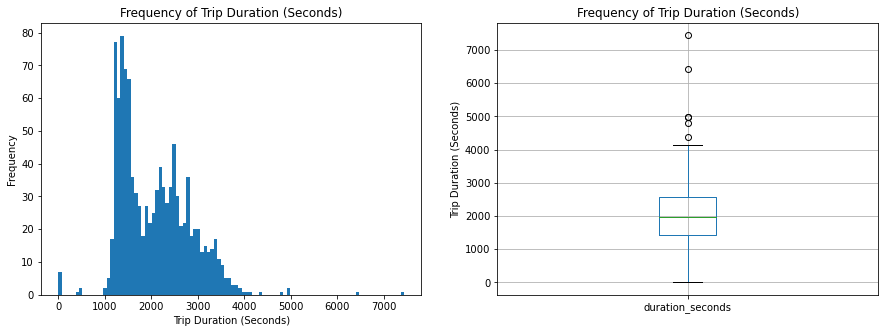

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df_airport.duration_seconds, bins=100)
axs[0].set_title('Frequency of Trip Duration (Seconds)')
axs[0].set_xlabel('Trip Duration (Seconds)')
axs[0].set_ylabel('Frequency')

df_airport.boxplot(ax=axs[1])
axs[1].set_title('Frequency of Trip Duration (Seconds)')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Trip Duration (Seconds)')

plt.show()

It doesn't make sense that there are rides of 0 minutes. We will filter those out along with other outliers.

In [20]:
# determining the outliers and filtering them out of the dataset

def outliers(column_name):
    global df_airport
    Q1 = df_airport[column_name].quantile(0.25)
    Q3 = df_airport[column_name].quantile(0.75)

    print("First quartile:", Q1)
    print("Third quartile:", Q3)

    IQR= Q3-Q1
    upper_limit = Q3+1.5*IQR
    print("Upper limit: {}".format(upper_limit))
    lower_limit = Q3-1.5*IQR
    print("Lower limit: {}".format(lower_limit))
    
    df_temporary = df_airport[df_airport[column_name] < upper_limit]
    df_airport = df_temporary

In [21]:
outliers('duration_seconds')

First quartile: 1438.25
Third quartile: 2580.0
Upper limit: 4292.625
Lower limit: 867.375


<a id='3.3'><a/>
## 3.3 Duplicates
[Return to Table of Contents](#back)

In [22]:
round(df_airport.duplicated().sum() / len(df_airport),4)*100

18.55

It appears that 18.5% of our data in df_airport is duplicated, a significant amount that will need to be dropped. 

In [23]:
print(df_airport.shape)
df_airport.drop_duplicates(inplace=True)
print(df_airport.shape)

(1062, 3)
(865, 3)


In [24]:
df_airport.duplicated().sum()

0

<a id='3.4'><a/>
## 3.4 Conclusion
[Return to Table of Contents](#back)

There was relatively little that needed to be preproceesed. The series 'start_ts' in file df_co_name was converted to the correct data typt (datetime). The df_airport file contained 197 duplicated lines, which represented 18.5% of our data. These lines were dropped.

<a id='4'><a/>
# 4. Exploratory Data Analysis
[Return to Table of Contents](#back)

<a id='4.1'><a/>
## 4.1 Top 10 Taxi Companies by Dropoffs
[Return to Table of Contents](#back)

In [43]:
top_taxi_co = df_co_name.nlargest(10, 'trips_amount')

In [44]:
top_taxi_co['pct_change'] = top_taxi_co.trips_amount.pct_change()
top_taxi_co['difference'] = top_taxi_co.trips_amount.diff()

In [45]:
top_taxi_co

,company_name,trips_amount,pct_change,difference
0,Flash Cab,19558,NaN,NaN
1,Taxi Affiliation Services,11422,-0.415993,-8136.0
2,Medallion Leasin,10367,-0.092366,-1055.0
3,Yellow Cab,9888,-0.046204,-479.0
4,Taxi Affiliation Service Yellow,9299,-0.059567,-589.0
5,Chicago Carriage Cab Corp,9181,-0.012690,-118.0
6,City Service,8448,-0.079839,-733.0
7,Sun Taxi,7701,-0.088423,-747.0
8,Star North Management LLC,7455,-0.031944,-246.0
9,Blue Ribbon Taxi Association Inc.,5953,-0.201476,-1502.0


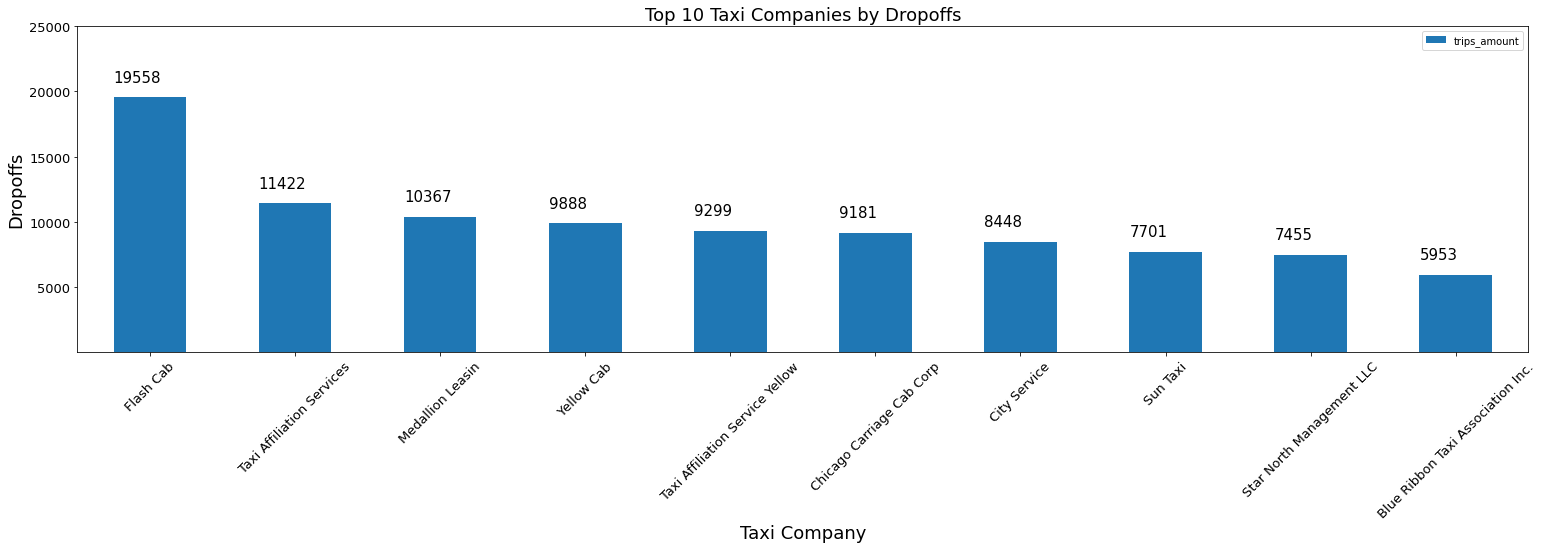

In [52]:
ax = top_taxi_co.plot(x='company_name', y='trips_amount', kind='bar', figsize=(26,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top 10 Taxi Companies by Dropoffs", fontsize=18)
ax.set_ylabel("Dropoffs", fontsize=18)
ax.set_xlabel('Taxi Company', fontsize=18)
ax.set_yticks([5000, 10000, 15000, 20000, 25000])
plt.xticks(rotation=45)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+1200, \
            str(round(i.get_height())), fontsize=15, color='black')

Here we can see the top 10 taxi companies by number of dropoffs. The largest company is Flash Cab, which performs almost 40% more dropoffs as the next largest company, Taxi Affiliation Services. Flash Cab is the  market leader given that it is one of the oldest, if not the oldest taxi company operating in Chicago, having been founded in 1945. In addition to its longevity and name recognition, it has a dedicated airport service. <br>
<br>
After Flash Cab, the next nine companies have dropoffs ranging from ~11,500 to ~6,000. The declines from one to the next are not nearly as dramatic as was the case with Flash Club, ranging from 1-9%, with the exception of Blue Ribbon Taxi, which had 205 fewer dropoffs than the company ranked just above it.

<a id='4.2'><a/>
## 4.2 Top 10 Neighborhoods by Dropoffs
[Return to Table of Contents](#back)

In [39]:
top_neighborhoods = df_neighborhood.nlargest(10, 'average_trips')

In [40]:
top_neighborhoods['pct_change'] = top_neighborhoods.average_trips.pct_change()
top_neighborhoods['difference'] = top_neighborhoods.average_trips.diff()

In [41]:
top_neighborhoods

,dropoff_location_name,average_trips,pct_change,difference
0,Loop,10727.466667,NaN,NaN
1,River North,9523.666667,-0.112217,-1203.800000
2,Streeterville,6664.666667,-0.300200,-2859.000000
3,West Loop,5163.666667,-0.225218,-1501.000000
4,O'Hare,2546.900000,-0.506765,-2616.766667
5,Lake View,2420.966667,-0.049446,-125.933333
6,Grant Park,2068.533333,-0.145575,-352.433333
7,Museum Campus,1510.000000,-0.270014,-558.533333
8,Gold Coast,1364.233333,-0.096534,-145.766667
9,Sheffield & DePaul,1259.766667,-0.076575,-104.466667


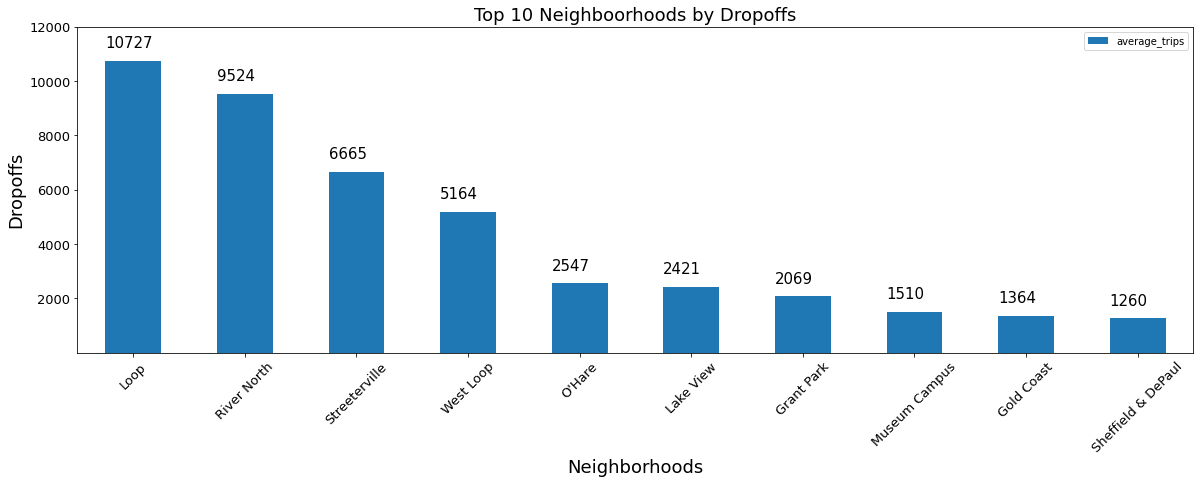

In [42]:
ax = top_neighborhoods.plot(x='dropoff_location_name', y='average_trips', kind='bar', figsize=(20,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top 10 Neighboorhoods by Dropoffs", fontsize=18)
ax.set_ylabel("Dropoffs", fontsize=18)
ax.set_xlabel('Neighborhoods', fontsize=18)
ax.set_yticks([2000, 4000, 6000, 8000, 10000, 12000])
plt.xticks(rotation=45)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+500, \
        str(round(i.get_height())), fontsize=15, color='black')

Here we can see the top 10 neighborhoods by number of dropoffs. From the airport, the most popular destination is the Loop, followered by River North. This is reasonable as the Loop and River North are located in the downtown Chicago area. These are urban centers characterized by high population density and a reliance on public transportation or reliance on cabs when necessary. In the second bucket we would find Streeterville and West Loop, which are urban, but less densely packed. In the third bucket fall the final six, which are more suburban locations where fewer headcounts of people are traveling to the airport and also where people are more likely to own vehicles. 

<a id='5'><a/>
# 5. Hypothesis Testing
[Return to Table of Contents](#back)

Zuber management has asked that we do an isolated test to determine if the the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Sundays. To perform this test, we will need to utilize samples taken from these two statistical populations, rainy Sundays and non-rainy Sundays.

In [33]:
# check to see that the file only contains Sundays

if (pd.DatetimeIndex(df_airport['start_ts']).dayofweek == 5).all():
    print("All dates in dataset fall on a Sunday.")
else:
    print("Not all dates in dataset fall on a Sunday")


All dates in dataset fall on a Sunday.


<a id='5.1'><a/>
### 5.1 Initial Statistical Review
[Return to Table of Contents](#back)

In [38]:
df_airport.groupby('weather_conditions')['duration_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_conditions,,,,,,,,
Bad,147.0,2391.741455,723.266296,480.0,1744.00,2460.0,2937.0,4044.0
Good,718.0,2007.380249,709.676819,0.0,1432.75,1873.0,2472.5,4140.0


The above suggests that the average length of a trip on a bad weather Sunday is 20% longer than a trip on a good weather Sunday. However it is important to note that the sample size for a bad weather Sunday is much smaller and for both weather conditions, the standard deviation is quite high. As such, we can not arrive at a conclusion based on this initial analysis; a t-test is needed.

<a id='5.2'><a/>
### 5.2 Assumptions Review
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average trip duration on a non-rainy Sunday day (good weather) = average duration on a rainy Sunday (bad weather) </li>
 <li>H1 (alternative hypothesis): average trip duration on a non-rainy Sunday day (good weather) <> verage duration on a rainy Sunday (bad weather) </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

<a id='5.3'><a/>
### 5.3 Hypothesis Test
[Return to Table of Contents](#back)

Before conducting the test itself, our hypothesis is that the duration of a trip on a bad weather (rainy) Sunday will not be the same as the duration of a trip on a good weather (non-rainy) Sunday

In [39]:
# before testing hypothesis with T-test, we must check sample variance for homogeneity

stat, p = levene(df_airport[df_airport.weather_conditions=='Good'].duration_seconds,df_airport[df_airport.weather_conditions=='Bad'].duration_seconds)
p

0.8428060845888675

The p-value (i.e. > 0.05) suggests that the populations do have equal variances.

In [40]:
st.ttest_ind(df_airport[df_airport.weather_conditions=='Good'].duration_seconds, df_airport[df_airport.weather_conditions=='Bad'].duration_seconds)

Ttest_indResult(statistic=-5.963153074778865, pvalue=3.605250565079261e-09)

The p_value < 0.05 and thus we reject the null hypothesis of equal averages. There is a statistical difference between the duration of a trip on a good weather Sunday and on a bad weather Sunday. Our hypothesis was correct.

<a id='6'><a/>
# 6. General Conclusion
[Return to Table of Contents](#back)

**Data Preprocessing**

The files that we were provided were uniform and complete. The minor preprocessing that needed to be done involved properly categorizing one data type and dropping some duplicates lines.

**Exploratory Data Analysis**

The largest taxi cab company is Flash Cab, which performs almost 40% more dropoffs as the next largest company, Taxi Affiliation Services. After Flash Cab, the next nine companies have dropoffs ranging from ~11,500 to ~6,000. Looking at the top 10 most popular destinations from the airport, the most popular destination is the Loop, followered by River North. In the second bucket in terms of drop off popularity is Streeterville and West Loop. In the third bucket fall the final six, with dropoff numbers that do not vary drastically from one to the next.

**Hypothesis Testing**

For this exercise, Zuber management has asked that we do an isolated test to determine if the the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Sundays. The result of this test was that there is a statistical difference between the duration of a trip on a rainy Sunday versus a non-rainy Sunday, which we hypothesized.